In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
speech = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\speech-unsupervised-ad.csv',header = None)

In [3]:
speech

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.35069,0.52721,-1.62470,-1.334000,-1.03020,1.247500,-0.98067,-1.558700,-0.061233,1.048200,...,0.570960,-1.19840,2.168600,-0.30353,1.21620,-0.607070,0.503820,-0.45571,0.86283,o
1,-0.42537,-0.08818,0.84575,0.881570,1.35690,0.748940,-1.68620,0.461510,0.585700,0.775950,...,-0.582980,-0.35666,-0.638000,0.64106,-0.94488,-1.069700,-0.024029,0.28696,-0.12374,o
2,-1.22100,0.43960,-0.06303,0.709530,0.95079,-0.218740,-1.24850,-1.628600,-1.339700,-1.858500,...,-0.042742,2.77110,1.549400,-1.75680,-0.91595,-0.078469,0.097137,-0.55111,0.69951,o
3,-0.30132,0.55221,0.13769,0.715290,0.99311,-0.169590,-0.93405,-0.948250,-0.750880,0.003107,...,-0.103520,2.53710,2.096000,-1.43680,-1.05230,-0.070276,-0.539810,-1.10380,0.70562,o
4,0.31292,0.42762,0.50348,0.005489,-0.94274,-0.176190,-0.50775,-0.464450,0.694750,0.376040,...,1.060700,1.39660,0.096776,-1.18360,-0.37802,0.357150,1.278600,-0.40139,0.11640,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,-0.73029,0.41857,-0.41746,-0.454210,0.71168,-0.052522,-1.86610,0.220370,0.488910,-2.072700,...,-0.586100,1.47180,0.263640,-0.68870,-1.10260,0.467970,0.481060,-0.29457,0.55751,n
3682,-0.29375,1.46840,-0.28178,-1.411000,-0.91399,1.427700,0.68553,-0.549750,0.025032,0.857950,...,0.575650,0.58935,2.316300,1.00600,-0.15520,-0.343240,-0.023543,-1.57520,-0.37716,n
3683,0.94843,0.35538,-1.04010,0.292630,0.17207,-0.549300,-2.22700,0.111300,0.403860,0.000354,...,0.544540,2.01170,0.584910,-0.43648,-0.11118,0.197870,0.189580,1.04610,-0.30757,n
3684,1.49800,-0.66785,1.04800,-1.569300,-0.65241,1.957500,0.45265,0.807050,0.601570,0.813750,...,-0.453780,-0.29842,-0.641800,0.49518,-2.56460,-0.708690,0.369670,-0.49249,-0.40257,n


In [4]:
shuffled_df = speech.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,400
0,0
1,0
2,0
3,0
4,0
...,...
3681,1
3682,0
3683,0
3684,0


In [6]:
accuracies = []
auc_scores = []
for i in range(10):
  iforest = IForest()
  iforest.fit(df)
  iforest_pred = iforest.labels_
  iforest_scores = iforest.decision_scores_
  
  iforest_accuracy = accuracy_score(y,iforest_pred)
  roc_auc = roc_auc_score(y, iforest_scores)

  accuracies.append(iforest_accuracy)
  auc_scores.append(roc_auc)

avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
  
print(avg_accuracy)
print(avg_auc)

0.8866521975040694
0.4706794799321651


In [6]:
iforest = IForest()
iforest.fit(df)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [7]:
iforest_pred = iforest.labels_
iforest_accuracy = accuracy_score(y,iforest_pred)
print(iforest_accuracy)

0.8871405317417255


In [8]:
iforest_scores = iforest.decision_scores_

F1-score: 0.03
0.463167891464104


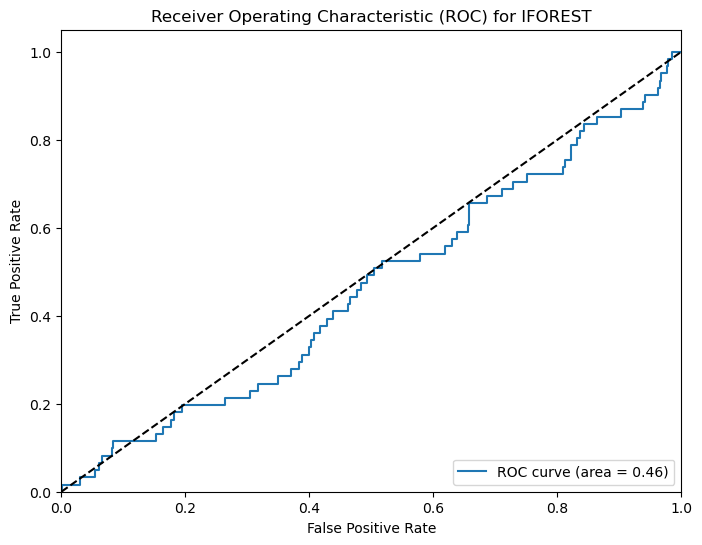

In [9]:
ifor_f1 = f1_score(y, iforest_pred)
print(f"F1-score: {ifor_f1:.2f}")

roc_auc = roc_auc_score(y, iforest_scores)
print(roc_auc)
ifor_fpr, ifor_tpr, _ = roc_curve(y, iforest_scores)

plt.figure(figsize=(8, 6))
plt.plot(ifor_fpr, ifor_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for IFOREST')
plt.legend(loc="lower right")
plt.show()